# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


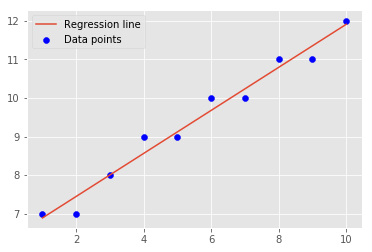

In [5]:
# Slope
def calc_slope(xs, ys):

    m = (((np.mean(xs)  * np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

# Intecept
def best_fit(xs,ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

# Predictions
def reg_line (m, c, X):
    
    return [(m*x) + c for x in X]

# Sum of Squared Errors
def sum_sq_err(ys_real, ys_predicted):

    sse = sum((ys_predicted - ys_real)**2)
    
    return sse

# Coefficient of Determination
def r_squared(ys_real, ys_predicted):    

    y_mean = [np.mean(ys_real) for yi in ys_real]
    rss = sum_sq_err(ys_real, ys_predicted)
    tss = sum_sq_err(ys_real, y_mean)
    r_sq =  (1 - (rss / tss))
    
    return r_sq

# Plotting
def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, color='blue',label='Data points')
    plt.plot(X, Y_pred, label='Regression line')
    plt.legend()
    return None

# Example data
m, c = best_fit(X, Y)
Y_pred = reg_line(m, c, X)
r_sq = r_squared(Y, Y_pred)

print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope:', round(m, 2))
print('Y-Intercept:', round(c, 2))
print('R-Squared:', round(r_sq, 2))
print('----------------------------')
print('Model: Y =', round(m, 2), '* X +', round(c, 2))

plot_reg(X, Y, Y_pred)


# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

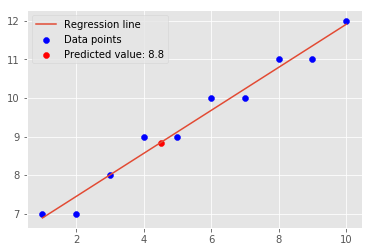

In [9]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_new = (m*x_new) + c
y_new

plot_reg(X, Y, Y_pred)
plt.scatter(x_new, y_new, color='red',label='Predicted value: '+ str(np.round(y_new, 1)))
plt.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

Level Up - Optional
Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


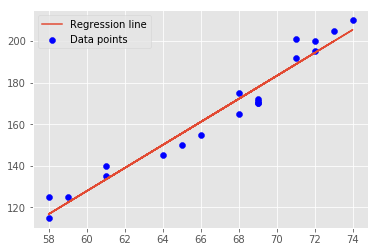

In [16]:
import pandas as pd

heightweight = pd.read_csv('heightweight.csv')
height = heightweight.height
weight = heightweight.weight

# Level Up Data
m_lu, c_lu = best_fit(height, weight)
weight_pred = reg_line(m_lu, c_lu, height)
r_sq_lu = r_squared(weight, weight_pred)

print('Level Up - Optional')
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope:', round(m_lu, 2))
print('Y-Intercept:', round(c_lu, 2))
print('R-Squared:', round(r_sq_lu, 2))
print('----------------------------')
print('Model: Y =', round(m_lu, 2), '* X +', round(c_lu, 2))

plot_reg(height, weight, weight_pred)



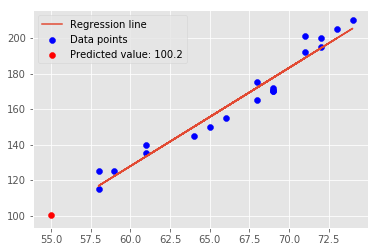

In [21]:
# Level up predictions
height_new = 55
weight_new = (m_lu*height_new) + c_lu
weight_new

plot_reg(height, weight, weight_pred)
plt.scatter(height_new, weight_new, color='red',label='Predicted value: '+ str(np.round(weight_new, 1)))
plt.legend()